In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("../app-rating-competition/train.csv")
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      8968 non-null   object 
 1   X1      8968 non-null   object 
 2   X2      8968 non-null   object 
 3   X3      8968 non-null   object 
 4   X4      8968 non-null   object 
 5   X5      8967 non-null   object 
 6   X6      8968 non-null   object 
 7   X7      8967 non-null   object 
 8   X8      8968 non-null   object 
 9   X9      8968 non-null   object 
 10  X10     8961 non-null   object 
 11  X11     8965 non-null   object 
 12  Y       7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB


In [29]:
def rename_columns(dataframe):
    reformated_df = dataframe.rename(
        columns={"X0": "App", "X1": "Category", "X2": "Reviews", "X3": "Size",
                 "X4": "Installs", "X5": "Type", "X6": "Price", "X7": "Content Rating",
                 "X8": "Genres", "X9": "Last Updated", "X10": "Current Ver",
                 "X11": "Android Ver", "Y": "Rating"})
    return reformated_df

df = rename_columns(df)

In [30]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values

App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          7
Android Ver          3
Rating            1474
dtype: int64


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(7187, 13)

In [33]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Rating            float64
dtype: object

In [34]:
print(df.isnull().sum())

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating            0
dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7187 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7187 non-null   object 
 1   Category        7187 non-null   object 
 2   Reviews         7187 non-null   object 
 3   Size            7187 non-null   object 
 4   Installs        7187 non-null   object 
 5   Type            7187 non-null   object 
 6   Price           7187 non-null   object 
 7   Content Rating  7187 non-null   object 
 8   Genres          7187 non-null   object 
 9   Last Updated    7187 non-null   object 
 10  Current Ver     7187 non-null   object 
 11  Android Ver     7187 non-null   object 
 12  Rating          7187 non-null   float64
dtypes: float64(1), object(12)
memory usage: 786.1+ KB


In [36]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7187 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7187 non-null   object 
 1   Category        7187 non-null   object 
 2   Reviews         7187 non-null   int64  
 3   Size            7187 non-null   object 
 4   Installs        7187 non-null   object 
 5   Type            7187 non-null   object 
 6   Price           7187 non-null   object 
 7   Content Rating  7187 non-null   object 
 8   Genres          7187 non-null   object 
 9   Last Updated    7187 non-null   object 
 10  Current Ver     7187 non-null   object 
 11  Android Ver     7187 non-null   object 
 12  Rating          7187 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 786.1+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7187 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7187 non-null   object 
 1   Category        7187 non-null   object 
 2   Reviews         7187 non-null   int64  
 3   Size            7187 non-null   object 
 4   Installs        7187 non-null   object 
 5   Type            7187 non-null   object 
 6   Price           7187 non-null   object 
 7   Content Rating  7187 non-null   object 
 8   Genres          7187 non-null   object 
 9   Last Updated    7187 non-null   object 
 10  Current Ver     7187 non-null   object 
 11  Android Ver     7187 non-null   object 
 12  Rating          7187 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 786.1+ KB


In [39]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0     500000.0
1    5000000.0
2     100000.0
3      50000.0
4      50000.0
Name: Installs, dtype: float64

In [40]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    14.0
1     8.7
2     2.8
3     5.6
4    19.0
Name: Size, dtype: float64

In [41]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()
    

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [42]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

Android Ver
4.0    4520
0.0     960
2.0     920
5.0     418
3.0     207
1.0      78
6.0      41
7.0      39
8.0       4
Name: count, dtype: int64

In [43]:
df.Category.value_counts() 

Category
FAMILY                 1364
GAME                    866
TOOLS                   596
COMMUNICATION           262
PRODUCTIVITY            260
PHOTOGRAPHY             255
MEDICAL                 252
PERSONALIZATION         251
FINANCE                 251
LIFESTYLE               242
SPORTS                  232
BUSINESS                224
HEALTH_AND_FITNESS      221
SOCIAL                  207
NEWS_AND_MAGAZINES      187
SHOPPING                167
TRAVEL_AND_LOCAL        157
BOOKS_AND_REFERENCE     134
DATING                  130
VIDEO_PLAYERS           129
EDUCATION               106
MAPS_AND_NAVIGATION     104
ENTERTAINMENT           100
FOOD_AND_DRINK           81
AUTO_AND_VEHICLES        59
WEATHER                  59
HOUSE_AND_HOME           54
LIBRARIES_AND_DEMO       49
ART_AND_DESIGN           45
COMICS                   41
EVENTS                   37
PARENTING                34
BEAUTY                   31
Name: count, dtype: int64

<Axes: ylabel='Category'>

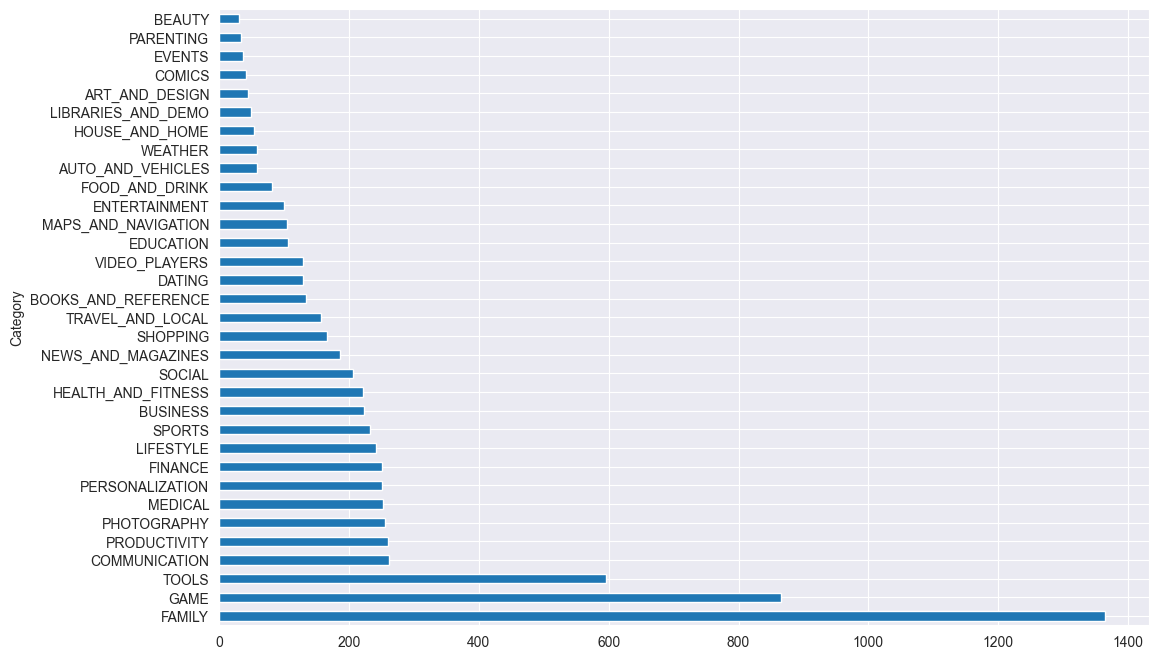

In [44]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

In [45]:
df.Rating.describe()

count    7187.000000
mean        4.183428
std         0.524952
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

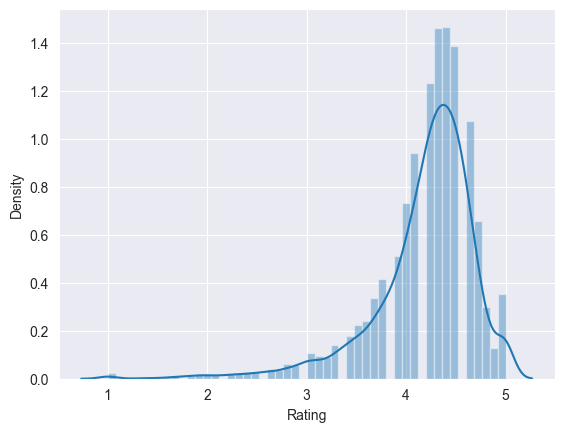

In [46]:
sns.distplot(df.Rating)

In [47]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  204


<Axes: xlabel='Reviews', ylabel='Density'>

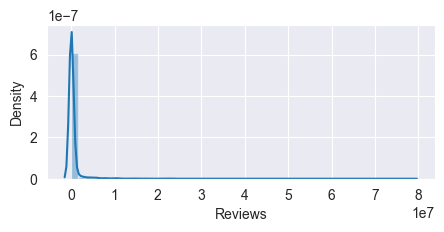

In [48]:
plt.figure(figsize=(5,2))
sns.distplot(df.Reviews)

In [49]:
df[df.Reviews>40000000]

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
265,WhatsApp Messenger,COMMUNICATION,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0,4.4
300,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0,4.0
1350,Clash of Clans,GAME,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0,4.6
1507,Clash of Clans,GAME,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0,4.6
2061,Facebook,SOCIAL,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0,4.1
2062,Instagram,SOCIAL,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0,4.5
3162,WhatsApp Messenger,COMMUNICATION,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0,4.4
3166,Instagram,SOCIAL,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0,4.5
3192,Facebook,SOCIAL,78128208,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0,4.1
3229,Clash of Clans,FAMILY,44881447,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0,4.6


([<matplotlib.patches.Wedge at 0x25d3c78eb70>,
 [Text(-1.0747615873063985, 0.23428087939614475, 'Free'),
  Text(1.074761603757615, -0.23428080392631306, 'Paid')],
 [Text(-0.5862335930762174, 0.12778957057971532, '93.2%'),
  Text(0.5862336020496082, -0.12778952941435257, '6.8%')])

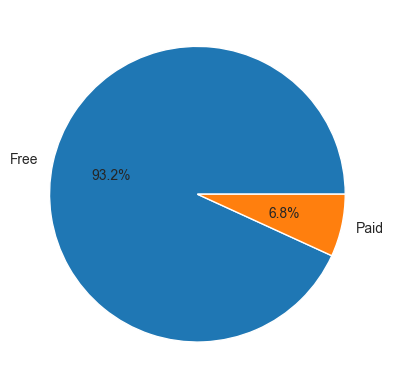

In [50]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [51]:
df[df.Price == df.Price.max()]

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
3530,I'm Rich - Trump Edition,LIFESTYLE,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0,3.6


In [52]:
df['Android Ver'].value_counts()

Android Ver
4.0    4520
0.0     960
2.0     920
5.0     418
3.0     207
1.0      78
6.0      41
7.0      39
8.0       4
Name: count, dtype: int64

<Axes: ylabel='count'>

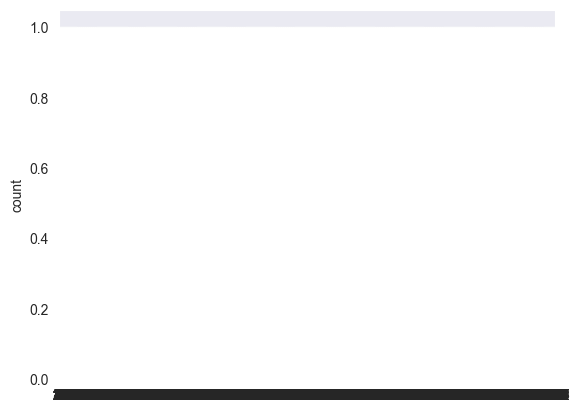

In [53]:
sns.countplot(df['Android Ver'])

<Axes: ylabel='count'>

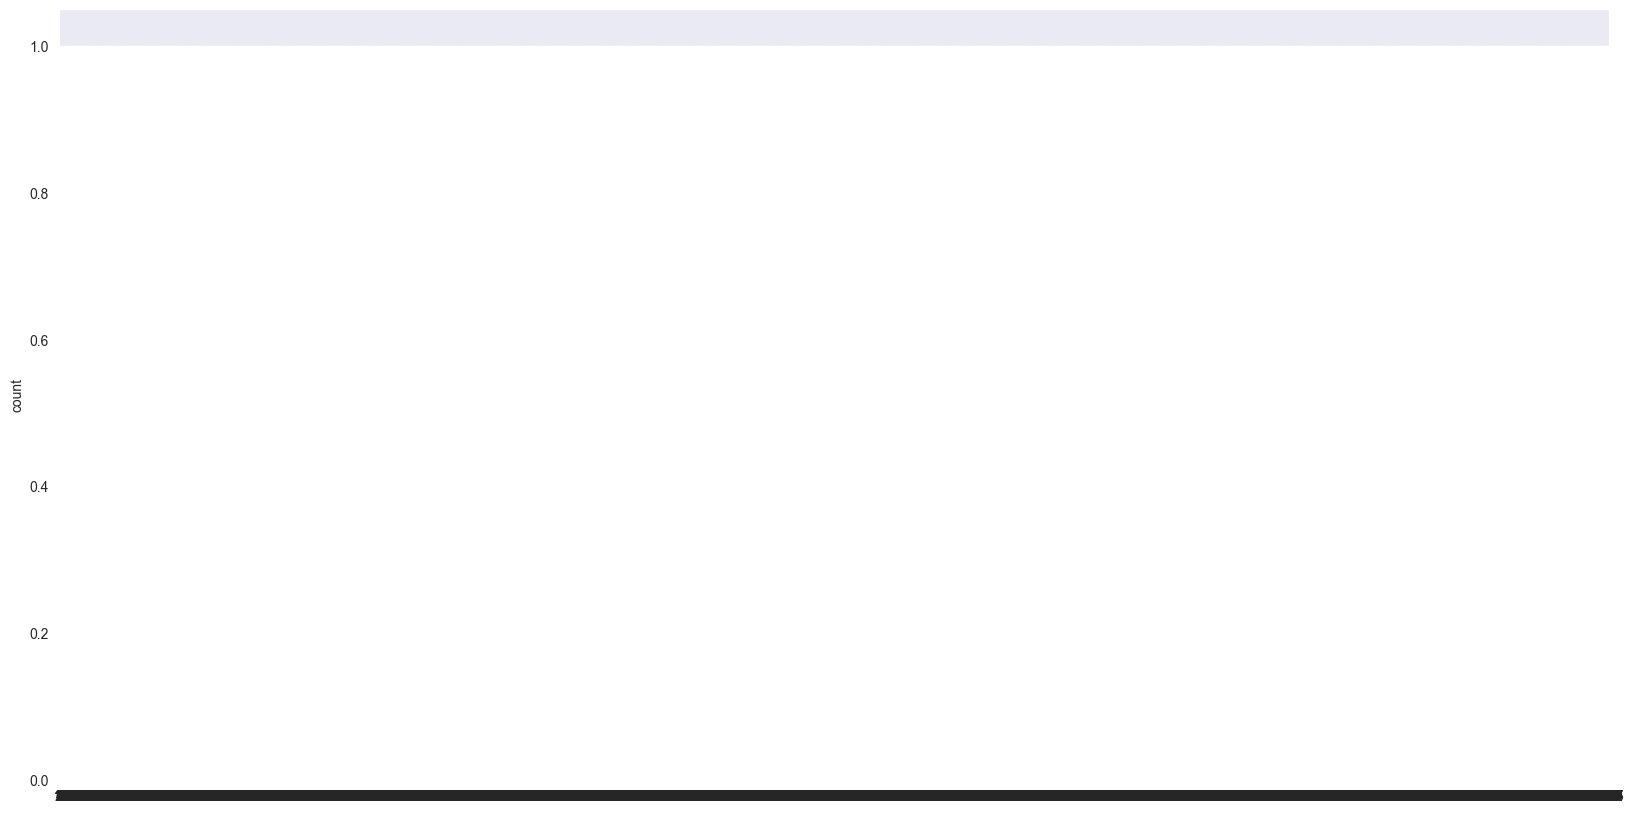

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(df['Rating'])

In [55]:
df.Rating.head(30)

0     3.9
1     4.7
2     4.3
3     4.4
4     3.8
5     4.1
6     4.7
7     4.4
8     4.4
9     4.6
11    4.7
12    4.3
13    4.0
14    4.1
15    4.7
17    4.8
18    4.7
19    4.1
20    3.9
21    4.1
22    4.2
23    4.2
24    3.8
25    4.7
26    4.1
27    4.0
28    4.5
29    4.4
30    3.8
31    4.2
Name: Rating, dtype: float64

In [56]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
0,Coloring book moana,ART_AND_DESIGN,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.0,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.0,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0,3.8


<Axes: xlabel='Genres'>

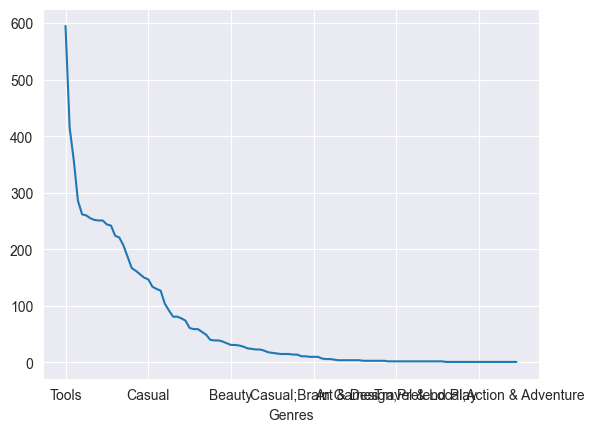

In [57]:
df.Genres.value_counts().plot(kind='line')

<Axes: ylabel='Rating'>

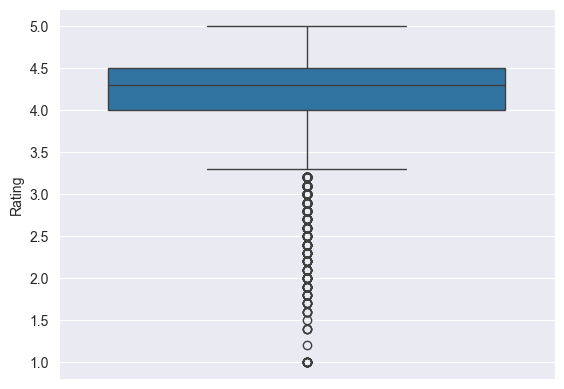

In [58]:
sns.boxplot((df['Rating']))

<Axes: ylabel='Android Ver'>

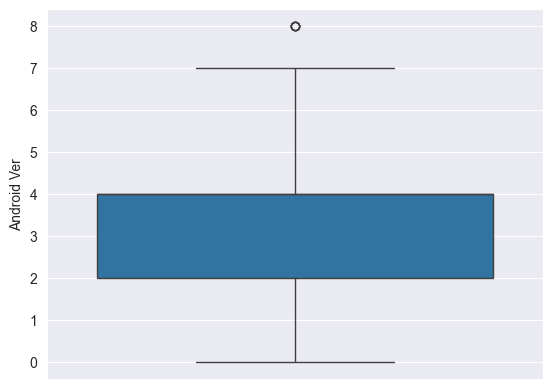

In [59]:
sns.boxplot((df['Android Ver']))

<Axes: ylabel='Android Ver'>

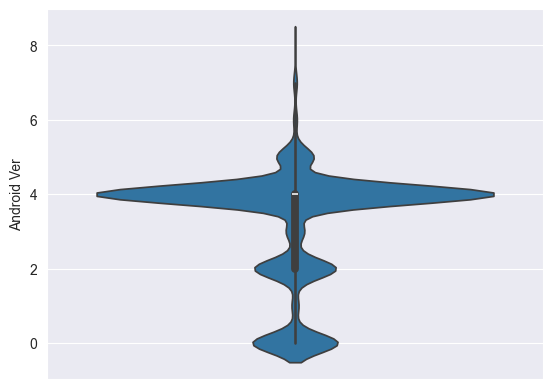

In [60]:
sns.violinplot((df['Android Ver']))

<Axes: ylabel='Reviews'>

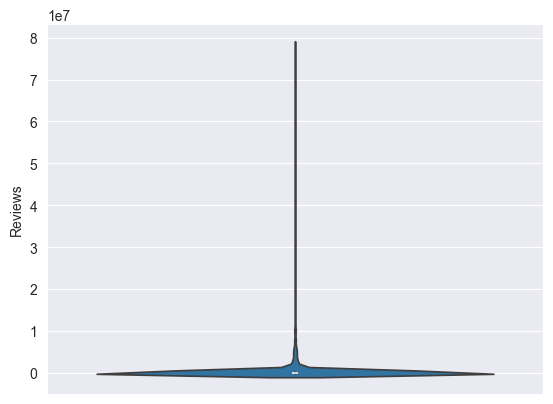

In [61]:
sns.violinplot((df['Reviews']))

<Axes: ylabel='Rating'>

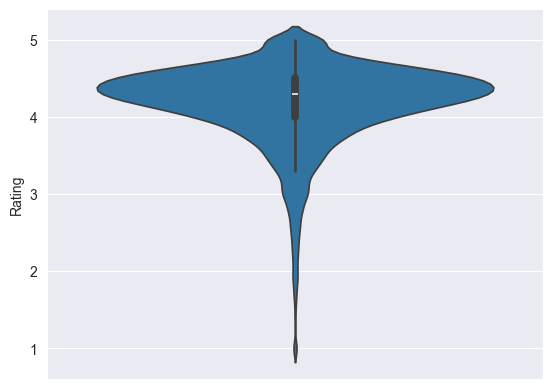

In [62]:
sns.violinplot((df['Rating']))

<Axes: xlabel='Price'>

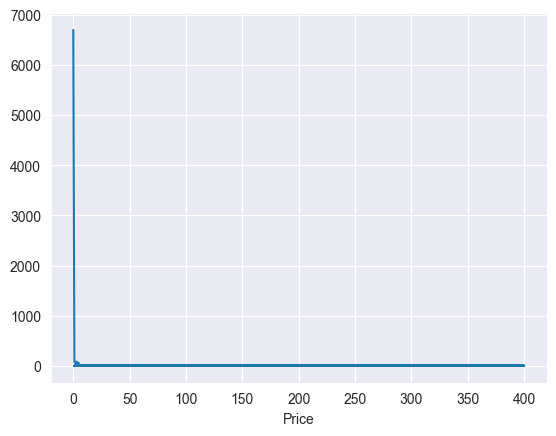

In [63]:
df.Price.value_counts().plot(kind='line')

<Axes: ylabel='Installs'>

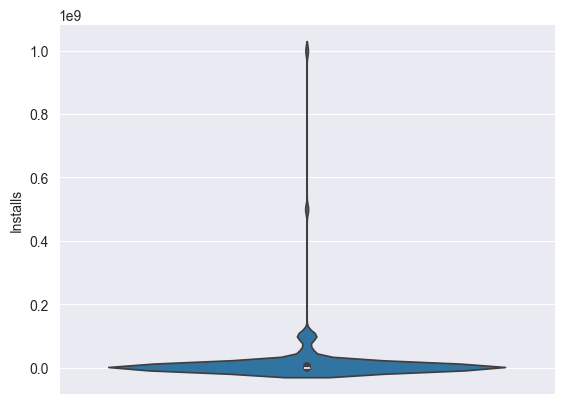

In [64]:
sns.violinplot((df['Installs']))

In [65]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
262,Hojiboy Tojiboyev Life Hacks,COMICS,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0,5.0
486,American Girls Mobile Numbers,DATING,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0,5.0
489,Awake Dating,DATING,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0,5.0
507,Girls Live Talk - Free Text and Video Chat,DATING,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0,5.0
511,Online Girls Chat Group,DATING,5,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 2, 2018",8.2,4.0,5.0


<Axes: xlabel='Installs', ylabel='Density'>

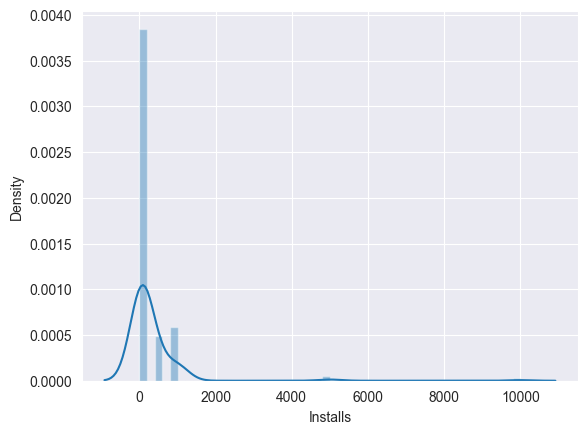

In [66]:
sns.distplot(df_full.Installs)

In [67]:
df_full.Installs.value_counts().sort_index()

Installs
1.0         3
5.0         4
10.0       36
50.0       25
100.0      89
500.0      20
1000.0     24
5000.0      2
10000.0     1
Name: count, dtype: int64

In [68]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
6631,Oración CX,LIFESTYLE,5000.0
6802,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
7834,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


<Axes: xlabel='Reviews', ylabel='Density'>

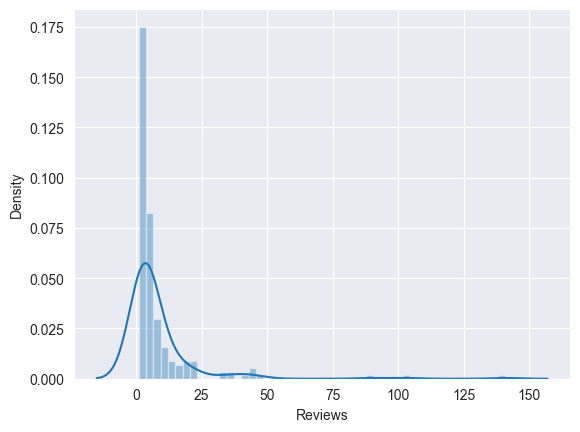

In [69]:
sns.distplot(df_full.Reviews)

In [70]:
df_full = df_full[df.Reviews > 30]

In [71]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  12


<Axes: xlabel='count', ylabel='Genres'>

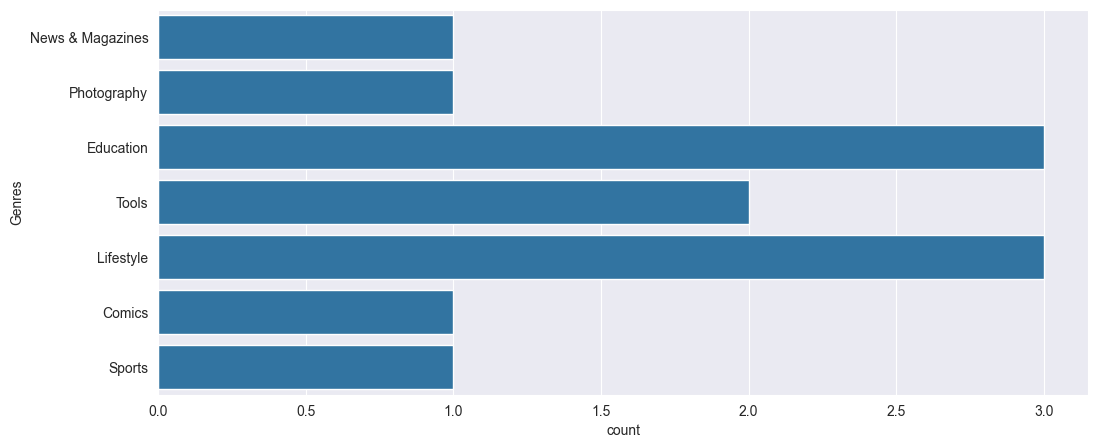

In [72]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

<Axes: ylabel='count'>

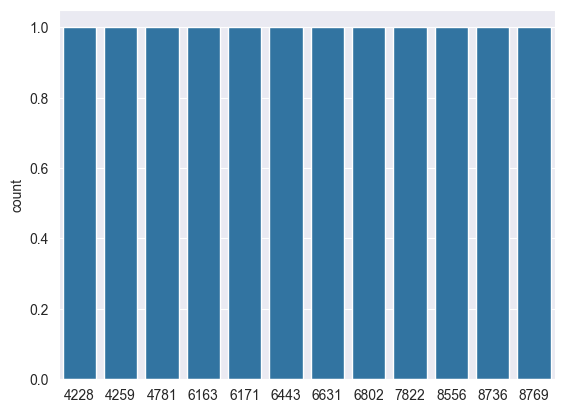

In [73]:
sns.countplot(df_full.Price)

In [74]:
df_four = df[df.Rating == 4]

In [75]:
df_four.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
13,Logo Maker - Small Business,ART_AND_DESIGN,450,14.0,100000.0,Free,0.0,Everyone,Art & Design,"April 20, 2018",4.0,4.0,4.0
27,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,591,9.4,500000.0,Free,0.0,Everyone,Art & Design,"March 31, 2018",1,4.0,4.0
35,Real Tractor Farming,AUTO_AND_VEHICLES,1598,56.0,1000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 26, 2018",11.0,4.0,4.0
42,Restart Navigator,AUTO_AND_VEHICLES,1403,201.0,100000.0,Free,0.0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.0,4.0
69,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,1754,14.0,500000.0,Free,0.0,Everyone,Auto & Vehicles,"June 2, 2018",2.3.4,4.0,4.0


In [76]:
df_four.shape

(421, 13)

<Axes: ylabel='count'>

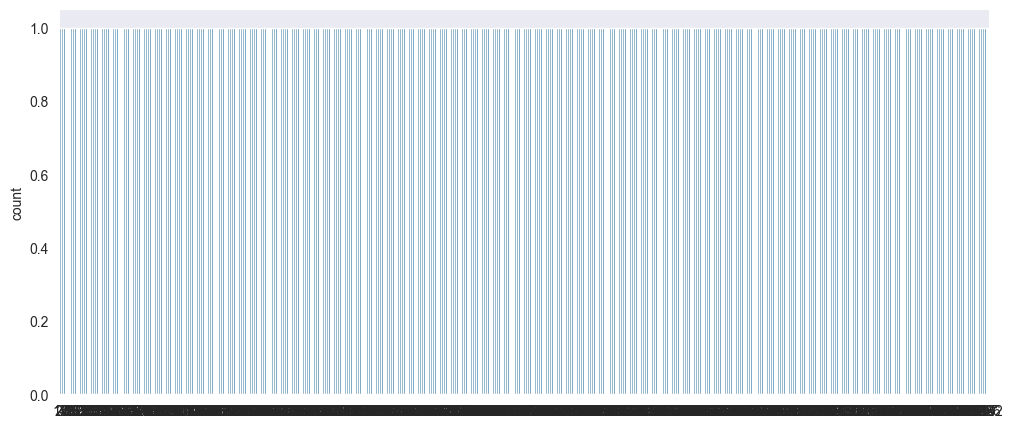

In [77]:
plt.figure(figsize=(12,5))
sns.countplot(df_four.Price)

<Axes: xlabel='count', ylabel='Category'>

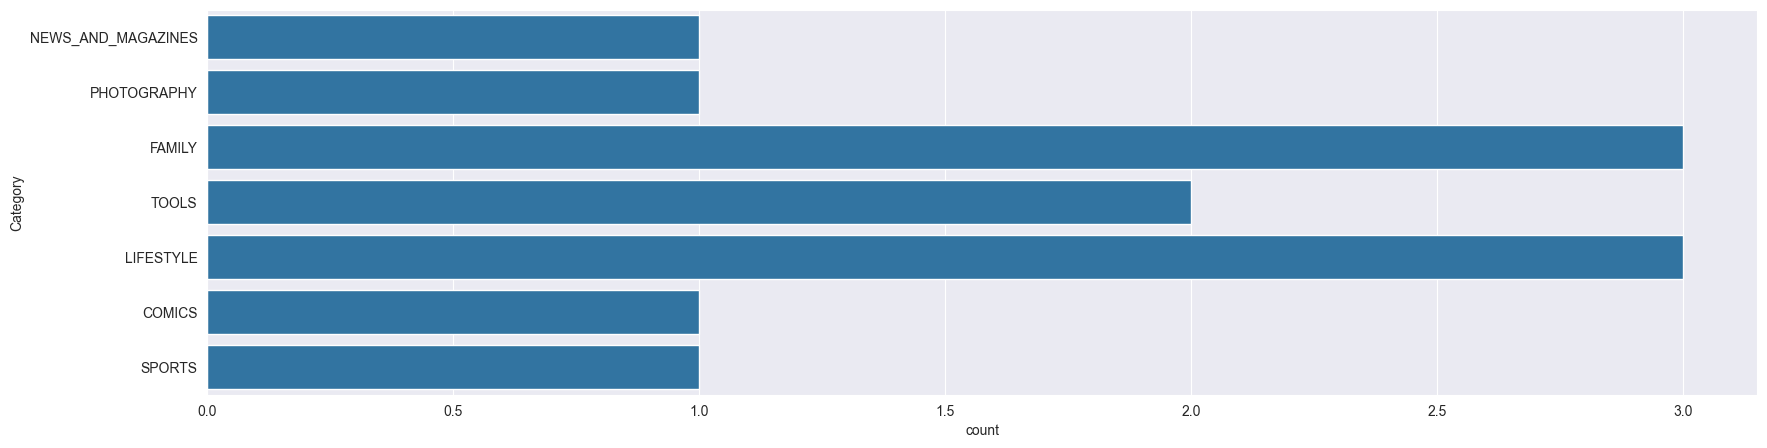

In [78]:
plt.figure(figsize=(20,5))
sns.countplot(df_full.Category)

In [79]:
df_three = df[df.Rating == 3]

In [80]:
df_three.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
409,FarmersOnly Dating,DATING,1146,1.4,100000.0,Free,0.0,Mature 17+,Dating,"February 25, 2016",2.2,4.0,3.0
435,The League,DATING,837,9.4,100000.0,Free,0.0,Mature 17+,Dating,"July 16, 2018",1.15.0,4.0,3.0
516,UK Girls Mobile Numbers,DATING,1,5.5,500.0,Free,0.0,Mature 17+,Dating,"July 19, 2018",1.0,4.0,3.0
738,Acorn TV: World-class TV from Britain and Beyond,ENTERTAINMENT,493,23.0,50000.0,Free,0.0,Everyone,Entertainment,"June 15, 2018",2.0.0,4.0,3.0
1277,Telstra,LIFESTYLE,4260,6.3,5000000.0,Free,0.0,Everyone,Lifestyle,"August 8, 2017",6.1,2.0,3.0


In [81]:
df_three.shape

(61, 13)

<Axes: xlabel='count', ylabel='Genres'>

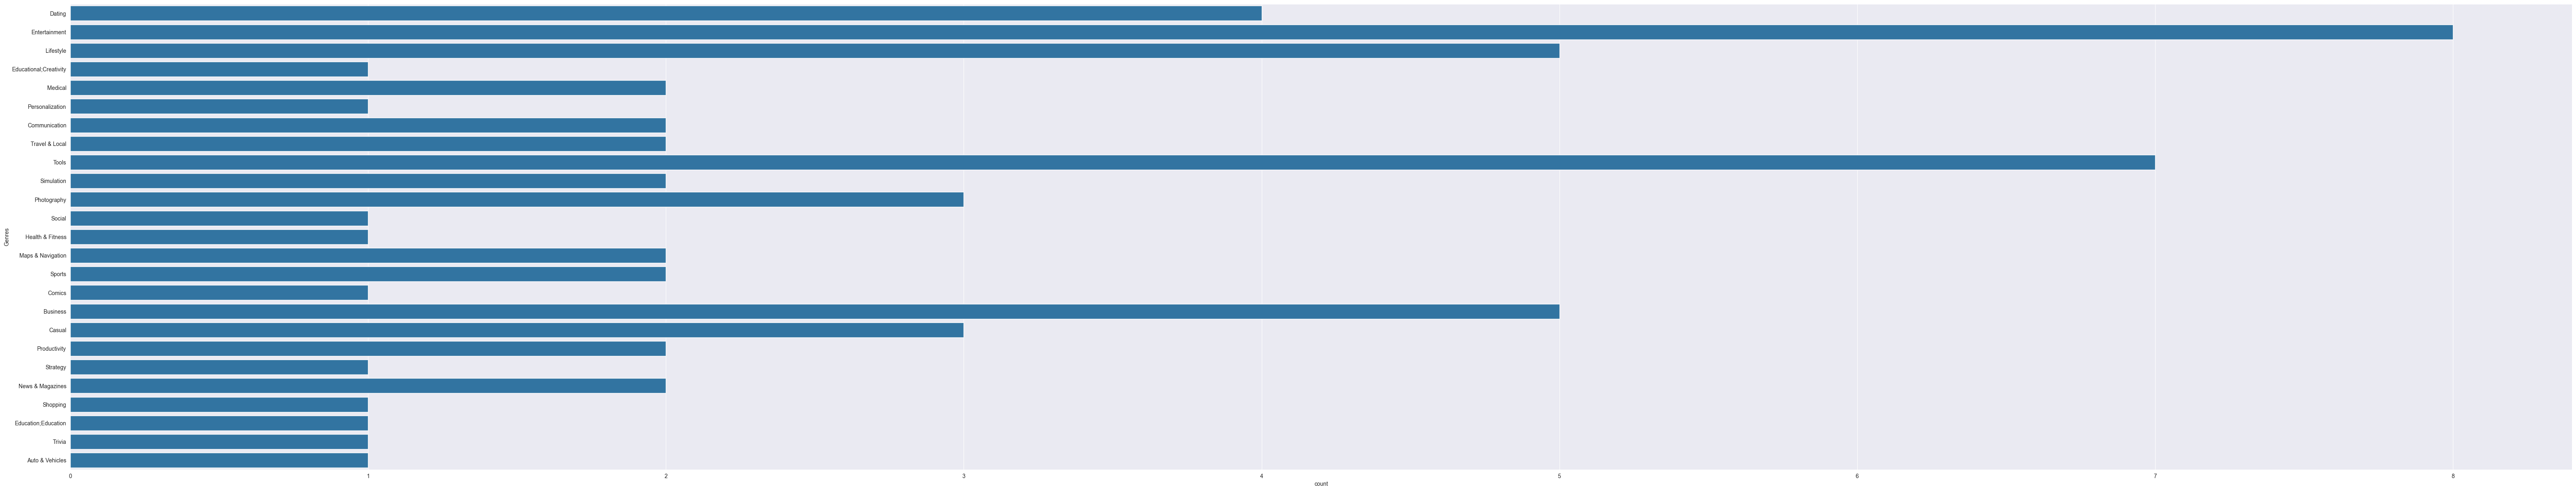

In [82]:
plt.figure(figsize=(80,15))
sns.countplot(df_three.Genres)

<Axes: xlabel='count', ylabel='Category'>

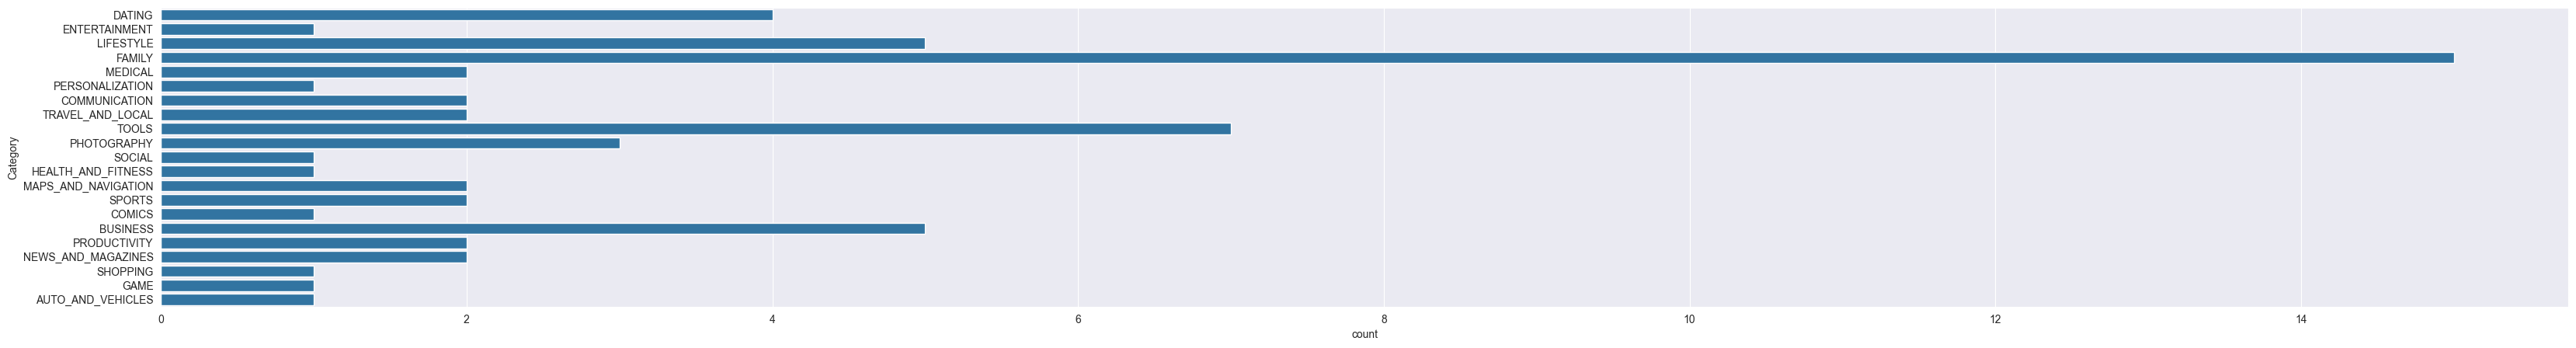

In [83]:
plt.figure(figsize=(40,5))
sns.countplot(df_three.Category)

<Axes: ylabel='count'>

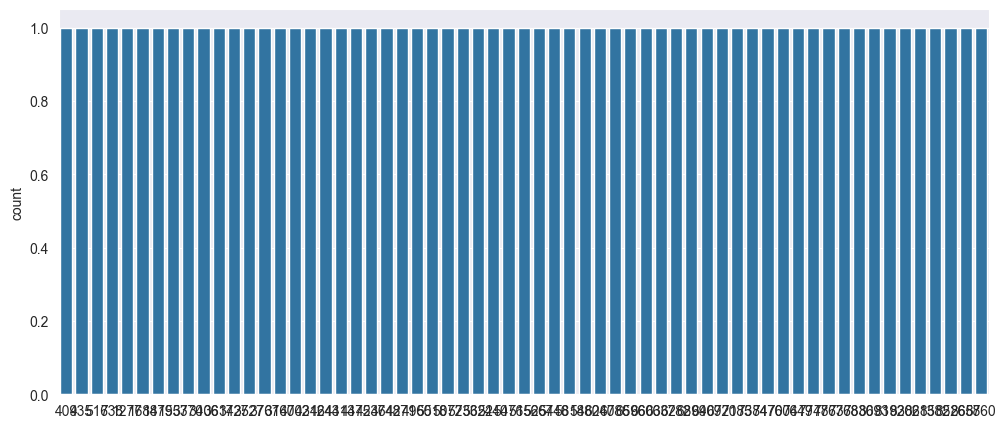

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(df_three.Price)

In [85]:
df[df.Rating == df.Rating.max()]

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
262,Hojiboy Tojiboyev Life Hacks,COMICS,15,37.0,1000.0,Free,0.00,Everyone,Comics,"June 26, 2018",2.0,4.0,5.0
486,American Girls Mobile Numbers,DATING,5,4.4,1000.0,Free,0.00,Mature 17+,Dating,"July 17, 2018",3.0,4.0,5.0
489,Awake Dating,DATING,2,70.0,100.0,Free,0.00,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0,5.0
507,Girls Live Talk - Free Text and Video Chat,DATING,6,5.0,100.0,Free,0.00,Mature 17+,Dating,"August 1, 2018",8.2,4.0,5.0
511,Online Girls Chat Group,DATING,5,5.0,100.0,Free,0.00,Mature 17+,Dating,"August 2, 2018",8.2,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,Mu.F.O.,GAME,2,16.0,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.0,5.0
8864,Mad Dash Fo' Cash,GAME,14,16.0,100.0,Free,0.00,Everyone,Arcade,"June 19, 2017",2.5a,4.0,5.0
8910,Monster Ride Pro,GAME,1,24.0,10.0,Free,0.00,Everyone,Racing,"March 5, 2018",2.0,2.0,5.0
8950,Fr. Daoud Lamei,FAMILY,22,8.6,1000.0,Free,0.00,Teen,Education,"June 27, 2018",3.8.0,4.0,5.0


In [86]:
df[df['Rating'] == 19]


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating


Here we added 2 more columns in the data set by spliting the last updated attribute, by doing this we find that in which year apps are added or updated on playstore.

In [87]:
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df['year_added']=df['Last Updated'].dt.year
df['month_added']=df['Last Updated'].dt.month

In [88]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating,year_added,month_added
0,Coloring book moana,ART_AND_DESIGN,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,3.9,2018,1
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,4.7,2018,8
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.0,4.3,2018,6
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.0,4.4,2017,3
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0,3.8,2018,4


In [89]:
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating', 'year_added', 'month_added'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7187 entries, 0 to 8967
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             7187 non-null   object        
 1   Category        7187 non-null   object        
 2   Reviews         7187 non-null   int64         
 3   Size            7187 non-null   float64       
 4   Installs        7187 non-null   float64       
 5   Type            7187 non-null   object        
 6   Price           7187 non-null   float64       
 7   Content Rating  7187 non-null   object        
 8   Genres          7187 non-null   object        
 9   Last Updated    7187 non-null   datetime64[ns]
 10  Current Ver     7187 non-null   object        
 11  Android Ver     7187 non-null   float64       
 12  Rating          7187 non-null   float64       
 13  year_added      7187 non-null   int32         
 14  month_added     7187 non-null   int32         
dtypes: dateti

In [95]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

KeyError: 'Type'

In [96]:
d1=df[df['Type']=='Free']
d2=df[df['Type']=='Paid']

In [97]:
col='year_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"app udated or added over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In the above plot we plot the app updated or added over the year Free vs Paid. By observing this plot we conclude that before 2011 there were no paid apps (after that google thinks that people have lots of money so why not take some charge for some apps >> just for fun ). But with the year free apps are added in huge ammount in comparision to paid apps --> people does not like paid services.

By compairing the app updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%.

SEE!! told you already that people like free service more than paid service.

In [98]:
col='month_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [99]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Content Rating ",'xaxis':{'title':"Contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [100]:
col='Content Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Content Rating",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [182]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Most important things about apps are there rating we even didn't see the app's whose ratings are less than 3.5 . Before downloading the app first we see the rating of app if the app rating is more then 4 than we say that yeah this is a good category of app then after we see other attribute of apps. Very less people see the review's of app. My personal observation is that some of the good people who are pationate about the technology and have enough time give the review of app. (we are data scientist and our maximum time goes in the cleaning of data).

In [183]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Rating",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [184]:
col='Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Paid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [185]:
col='Category'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

We already discuss about the category of the apps that most of the apps are belongs to the category of Family Game and Tools. --> 2nd most category of apps are Games kids now these days!!!

In [186]:
col='Android Ver'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Android Versions"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [187]:
col='Installs'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Installed App ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

By ovserving the above plot highest installs of the apps are crossing the 1M than 10M than 100k, very less app are crossing the 500M and dream install 1B . some apps like Instagram, Youtoube, Facebook Whtsapp etc are crossing the dream installs 1B.

In [188]:
d3=df[df['Rating']==4.5]
d4=df[df['Rating']==4]

In [189]:
col='Content Rating'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#6ad49b"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Rating over the contents",'xaxis':{'title':"Content Rating"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [190]:
col='Android Ver'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Rating over the Android Version "}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [191]:
col='Category'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Category wise Rating"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [192]:
col='Installs'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Rating over total Installs ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [193]:
df["Rating"] = df["Reviews"].apply(lambda x: 1 if x > 3 else 0)



In [194]:
df.Rating.value_counts().sort_index()

0     225
1    8661
Name: Rating, dtype: int64

In [101]:
df

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating,year_added,month_added
0,Coloring book moana,ART_AND_DESIGN,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,3.9,2018,1
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,4.7,2018,8
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.0,4.3,2018,6
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.0,4.4,2017,3
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0,3.8,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8961,Chemin (fr),BOOKS_AND_REFERENCE,44,619.0,1000.0,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.0,4.8,2014,3
8962,FR Calculator,FAMILY,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.0,4.0,2017,6
8964,Sya9a Maroc - FR,FAMILY,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.0,4.5,2017,7
8965,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.0,5.0,2018,7


In [102]:
df.isnull().sum().sum()


0

In [103]:
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df=pd.concat(frames,axis=1)
df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [104]:
df.shape

(7187, 49)

In [105]:
df.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [106]:
df.head()

,Reviews,Rating,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,967,3.9,2018,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,87510,4.7,2018,8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,967,4.3,2018,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,167,4.4,2017,3,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,178,3.8,2018,4,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [107]:
df.shape

(7187, 42)

In [108]:
X=df.drop('Rating',axis=1)
y=df['Rating'].values
y=y.astype('int')

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [110]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

Logestic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [111]:
from sklearn.utils import resample
df_majority = df[df.Rating==1]
df_minority = df[df.Rating==0]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=8661,    # to match majority class
                                 random_state=225)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Rating.value_counts()


ValueError: high <= 0

In [112]:
y = df_upsampled.Rating
X = df_upsampled.drop('Rating', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )

NameError: name 'df_upsampled' is not defined

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [208]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 1.0


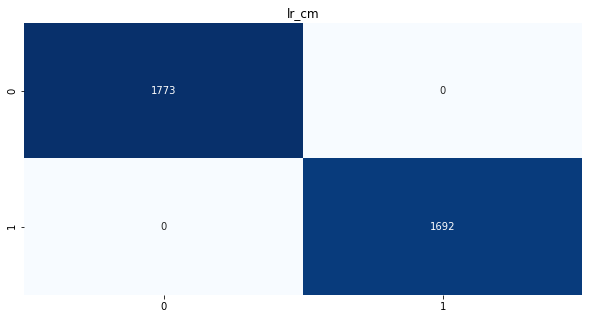

In [209]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

DecisionTree Classifier

A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [210]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 1.0


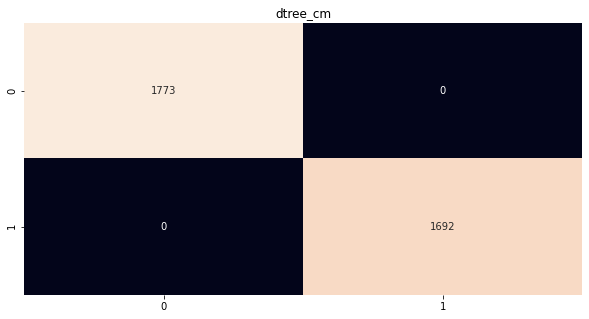

In [211]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

In [212]:
#SVM 
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svc_pred=svc_r.predict(X_test)
svc_cm=confusion_matrix(y_test,svc_pred)
svc_ac=accuracy_score(y_test, svc_pred)

SVM_Classification_accuracy: 0.6637806637806638


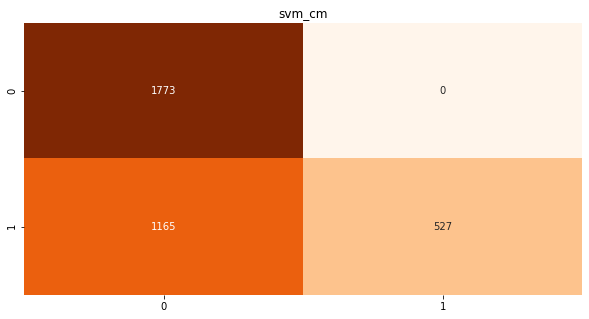

In [217]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svc_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_Classification_accuracy:',svc_ac)

RandomForest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [214]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 1.0


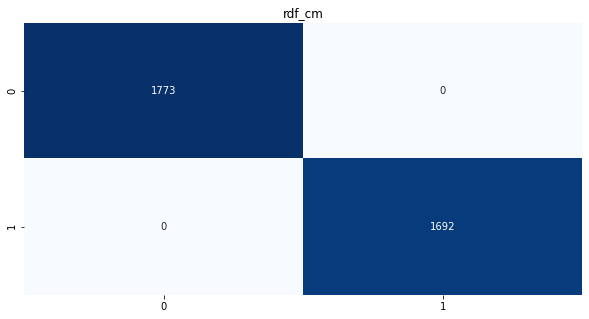

In [215]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

Models comparision
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In this notebbok 4 different algorithms are compared

Text(0.5, 1.0, 'Model Accracy')

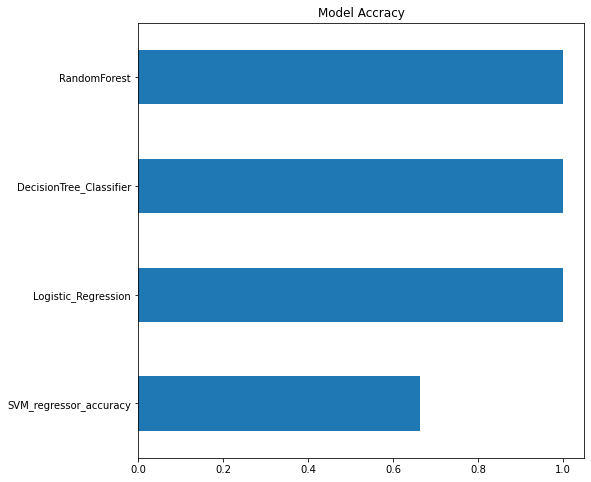

In [216]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')